<a href="https://colab.research.google.com/github/enockmwizerwa123/ARIMA-Autoregressive-Integrated-Moving-Average/blob/main/SARIMA%20MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("/content/Busogo.csv")

In [ ]:
data.head()

,Year,Rainfall
0,1981,963
1,1982,1376
2,1983,1106
3,1984,768
4,1985,1114


In [ ]:
data.tail()

,Year,Rainfall
36,2017,623
37,2018,1262
38,2019,1466
39,2020,1620
40,2021,1709


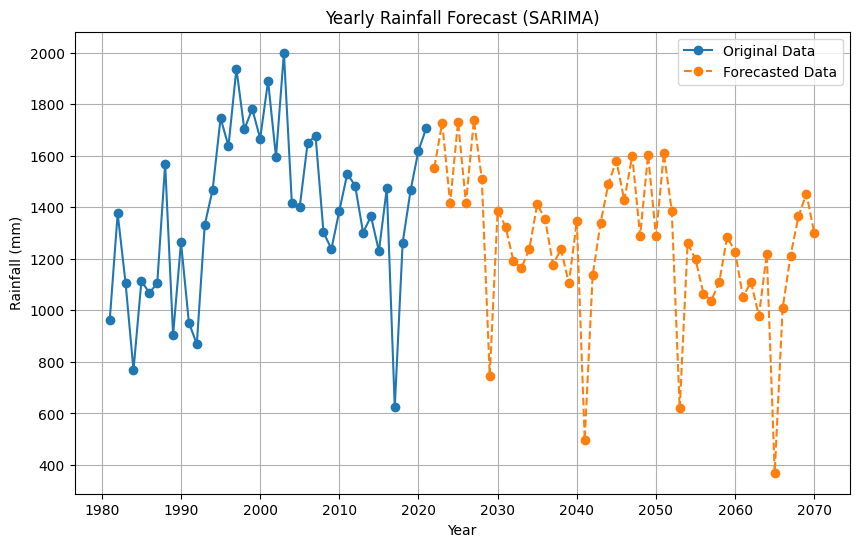

In [ ]:
# Assuming 'Year' is a datetime column, if not, you should convert it to datetime.
#data['Year'] = pd.to_datetime(data['Year'], format='%Y')
#Set 'Year' as the index for time series analysis
#data.set_index('Year', inplace=True)
# Fit a SARIMA model
p = 1  # AutoRegressive (AR) order
d = 1  # Integrated (I) order (for differencing)
q = 1  # Moving Average (MA) order

P = 1  # Seasonal AutoRegressive (SAR) order
D = 1  # Seasonal Integrated (SI) order (for seasonal differencing)
Q = 1  # Seasonal Moving Average (SMA) order
s = 12  # Seasonal period (assuming yearly data with a seasonal cycle)

model = SARIMAX(data['Rainfall'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Forecast future years
future_years = pd.date_range(start='2021-01-01', end='2070-01-01', freq='Y')
future_rainfall = model_fit.forecast(steps=len(future_years))

# Create a DataFrame for the future predictions
future_data = pd.DataFrame({'Year': future_years, 'Rainfall': future_rainfall})

# Concatenate the original data and future predictions
forecasted_data = pd.concat([data, future_data])

# Plot the original data and forecasted data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Rainfall'], label='Original Data', marker='o')
plt.plot(future_data['Year'], future_data['Rainfall'], label='Forecasted Data', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly Rainfall Forecast (SARIMA)')
plt.legend()
plt.grid(True)
plt.savefig('Busogo-trend.png')

# Show the plot
plt.show()

# Save the forecasted data to a new CSV file
forecasted_data.reset_index(inplace=True)  # Reset the index before saving
forecasted_data.to_csv('Busogo-Forecasted-SARIMA.csv', index=False)


<h1> <center> Forecasted data with Trend line:👍👍

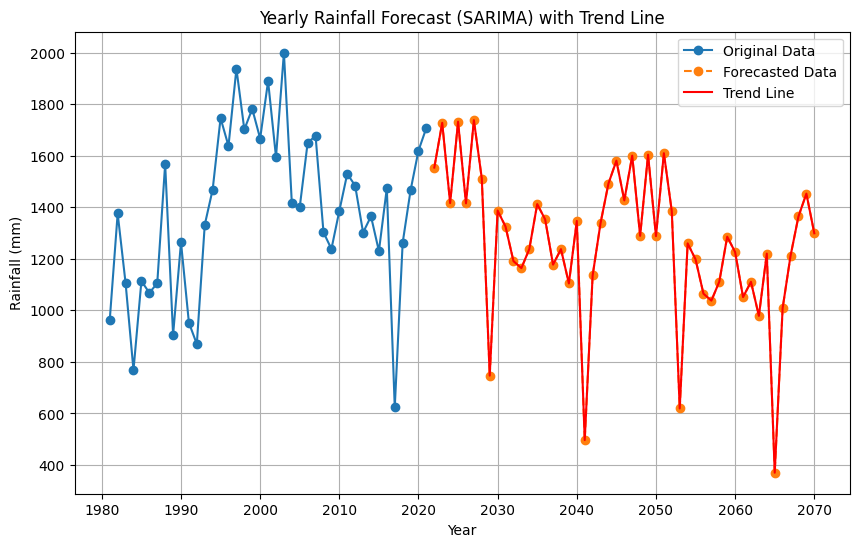

In [44]:
model = SARIMAX(data['Rainfall'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Forecast future years
future_years = pd.date_range(start='2021-01-01', end='2070-01-01', freq='Y')
future_rainfall = model_fit.forecast(steps=len(future_years))

# Create a DataFrame for the future predictions
future_data = pd.DataFrame({'Year': future_years, 'Rainfall': future_rainfall})

# Concatenate the original data and future predictions
forecasted_data = pd.concat([data, future_data])

# Plot the original data and forecasted data with a trend line
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Rainfall'], label='Original Data', marker='o')
plt.plot(future_data['Year'], future_data['Rainfall'], label='Forecasted Data', marker='o', linestyle='--')
plt.plot(future_data['Year'], future_rainfall, label='Trend Line', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly Rainfall Forecast (SARIMA) with Trend Line')
plt.legend()
plt.grid(True)
plt.savefig('Busogo-trend.png')

# Show the plot
plt.show()

# Save the forecasted data to a new CSV file
forecasted_data.reset_index(inplace=True)  # Reset the index before saving
forecasted_data.to_csv('Busogo-Forecasted-SARIMA.csv', index=False)
